In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as ios

In [2]:
path = 'ex7data2.mat'
data = ios.loadmat(path)
X = data['X']
print(data.keys())
print(X.shape)

dict_keys(['__header__', '__version__', '__globals__', 'X'])
(300, 2)


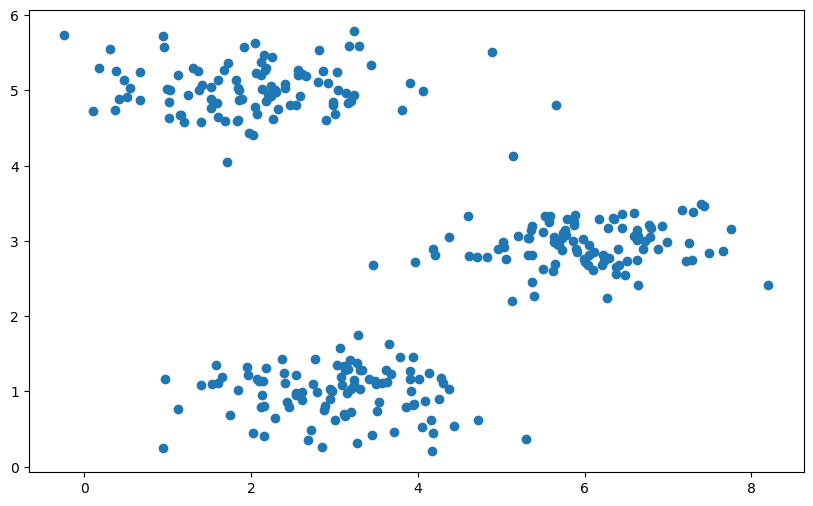

In [3]:
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(X[:,0],X[:,1])
plt.show()

In [4]:
def find_father(X,centors):
    index_i = []
    for i in range(len(X)):
        a = np.linalg.norm((X[i]-centors),axis=1)
        index_i.append(np.argmin(a))

    return np.array(index_i)

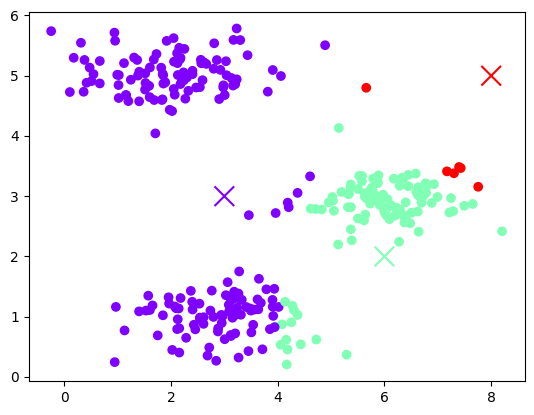

In [5]:
init_centors = np.array([[3,3],[6,2],[8,5]])
idx = find_father(X,init_centors)
plt.scatter(X[:,0],X[:,1],c=idx,cmap='rainbow')
plt.scatter(init_centors[:,0],init_centors[:,1],s=200,marker='x',c=[1,2,3],cmap='rainbow')
plt.show()

In [6]:
def computer_centors(X,idx,k):
    new_centors = []
    for i in range(k):
        new_centors.append(list(np.mean(X[idx==i],axis=0)))
    
    return np.array(list(new_centors))

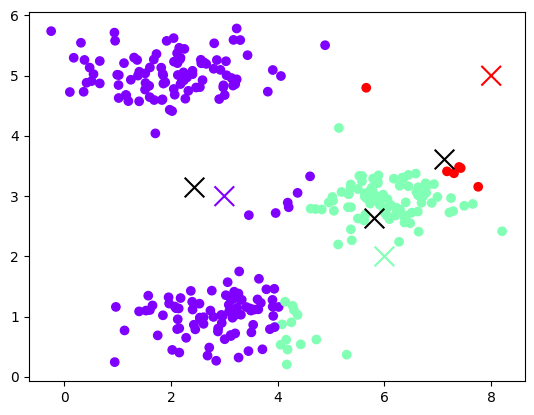

In [7]:
new_centors = computer_centors(X,idx,3)
plt.scatter(X[:,0],X[:,1],c=idx,cmap='rainbow')
plt.scatter(init_centors[:,0],init_centors[:,1],s=200,marker='x',c=[1,2,3],cmap='rainbow')
plt.scatter(new_centors[:,0],new_centors[:,1],s=200,marker='x',c='k')
plt.show()

In [8]:
def run_k_mean(X,centors,iters):
    l = len(centors)
    centors_all = []
    centors_all.append(centors)
    centors_i = centors
    for i in range(iters):
        idx = find_father(X,centors_i)
        centors_i = computer_centors(X,idx,l)
        centors_all.append(centors_i)
    return idx,np.array(centors_all)

(11, 3, 2)


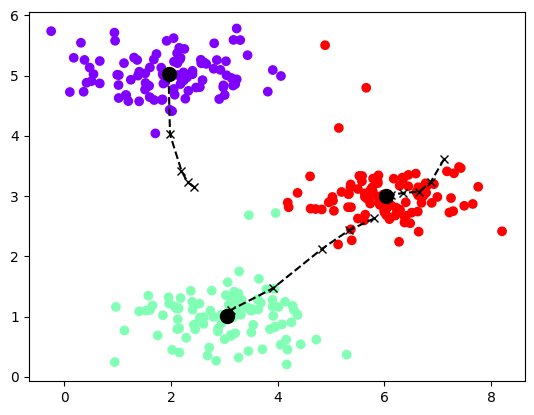

In [9]:
idx,centors_all = run_k_mean(X,new_centors,10)
print(centors_all.shape)
plt.scatter(X[:,0],X[:,1],c=idx,cmap='rainbow')
plt.scatter(centors_all[10,:,0],centors_all[10,:,1],s=100,marker='o',c='k')
plt.plot(centors_all[:,:,0],centors_all[:,:,1],'kx--')
plt.show()